In [1]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *

client = Client()

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
chrom = 22
filename = os.path.join(KL_data_dir, f"whole_genome/zoonomia_phastcons_primates/{chrom}/_metadata")
rate = dd.read_parquet(filename.split("_metadata")[0])
rate.head()

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


,Pos,mu,Allele_ref,Allele,mu_index,AN_total_interpolate,AC_total,filter_int,AF_gnomADv3,AF_ukb,AF,window_100bp,polymorphic,polymorphic_100bp,Neutral,cds,Freq_bin_9,Freq_bin_10,p_9,E[p_9],Var[p_9],p_2,E[p_2],Var[p_2],Zoonomia_phastcons_primates
0,11253100,2.659,G,A,49,1135310.0,93.0,4,0.00021,0.000062,8.191595e-05,0,1,122,NaN,False,6,6,-0.892526,-0.624098,0.070286,-1.000000,-0.996884,0.003096,0.0
1,11253100,0.128,G,T,11,1135225.0,0.0,4,NaN,NaN,0.000000e+00,0,0,122,NaN,False,0,0,-0.712308,-0.765350,0.007888,-0.712308,-0.795075,0.016961,0.0
2,11253101,0.041,T,A,3,1135225.0,2.0,4,NaN,0.000002,1.761765e-06,0,1,122,NaN,False,2,2,-0.965165,-0.905086,0.000443,-1.000000,-0.908619,0.000946,0.0
3,11253101,0.041,T,G,3,1135225.0,1.0,4,NaN,0.000001,8.808826e-07,0,1,122,NaN,False,1,1,-0.949767,-0.905086,0.000443,-1.000000,-0.908619,0.000946,0.0
4,11253101,0.117,T,C,10,1135140.0,22970.0,4,0.02586,0.019366,2.023539e-02,0,1,122,NaN,False,8,8,-1.000000,-0.779518,0.006429,-1.000000,-0.804747,0.013817,0.0


In [106]:
chrom = 22
columns = ["Pos", "mu", "Neutral", "cds", "AF", "p_9", "E[p_9]", "Var[p_9]", "p_2", "E[p_2]", "Var[p_2]", "Zoonomia_phastcons_primates"]
rate = dd.read_parquet(filename.split("_metadata")[0], columns = columns)
rate["Neutral"] = rate["Neutral"].fillna(0)
rate["Neutral"] = rate["Neutral"].astype(int)
rate["cds"] = rate["cds"].astype(int)
rate = rate[~rate["Zoonomia_phastcons_primates"].isna()]

In [6]:
len(rate)

82728486

In [70]:
len(rate[rate["Zoonomia_phastcons_primates"].isna()])

7734

In [9]:
rate.head()

,Pos,mu,Neutral,cds,AF,p_9,E[p_9],Var[p_9],p_2,E[p_2],Var[p_2],Zoonomia_phastcons_primates
0,11253100,2.659,0,0,8.191595e-05,-0.892526,-0.624098,0.070286,-1.000000,-0.996884,0.003096,0.0
1,11253100,0.128,0,0,0.000000e+00,-0.712308,-0.765350,0.007888,-0.712308,-0.795075,0.016961,0.0
2,11253101,0.041,0,0,1.761765e-06,-0.965165,-0.905086,0.000443,-1.000000,-0.908619,0.000946,0.0
3,11253101,0.041,0,0,8.808826e-07,-0.949767,-0.905086,0.000443,-1.000000,-0.908619,0.000946,0.0
4,11253101,0.117,0,0,2.023539e-02,-1.000000,-0.779518,0.006429,-1.000000,-0.804747,0.013817,0.0


# Get distribution of Zoonomia_phastcons_primates

Text(0.5, 1.0, 'Distribution of Zoonomia Phastcons Primates in Chr22')

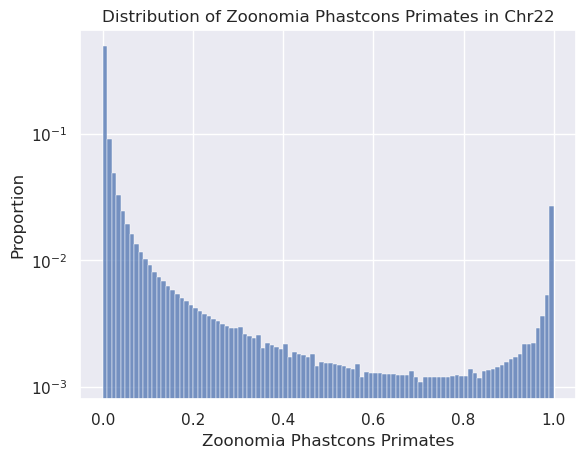

In [58]:
sns.set_theme(style="darkgrid")
g = sns.histplot(data=Zoonomia_phastcons_primates_list, binwidth = 0.05, stat = 'proportion')
g.set_yscale("log")
g.set_xlabel("Zoonomia Phastcons Primates")
g.set_title("Distribution of Zoonomia Phastcons Primates in Chr22")

Text(0.5, 1.0, 'Distribution of Zoonomia Phastcons Primates in Chr22')

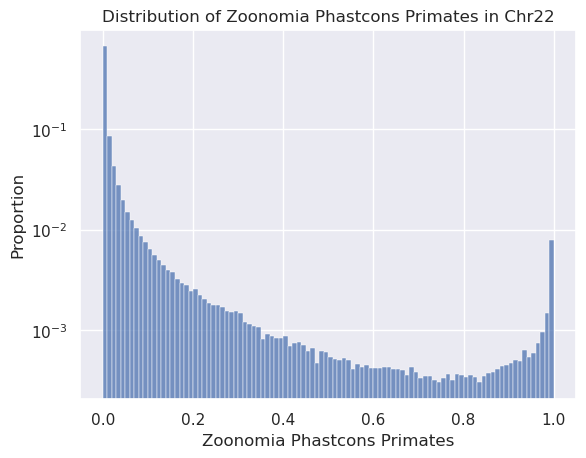

In [60]:
sns.set_theme(style="darkgrid")
g = sns.histplot(data=rate_neutral["Zoonomia_phastcons_primates"], binwidth = 0.05, stat = 'proportion')
g.set_yscale("log")
g.set_xlabel("Zoonomia Phastcons Primates")
g.set_title("Distribution of Zoonomia Phastcons Primates in Chr22")

# Calculate score for 50 nucleotide window

In [107]:
rate["50bp_window"] = rate.Pos//50

In [108]:
rate.head()

,Pos,mu,Neutral,cds,AF,p_9,E[p_9],Var[p_9],p_2,E[p_2],Var[p_2],Zoonomia_phastcons_primates,50bp_window
0,11253100,2.659,0,0,8.191595e-05,-0.892526,-0.624098,0.070286,-1.000000,-0.996884,0.003096,0.0,225062
1,11253100,0.128,0,0,0.000000e+00,-0.712308,-0.765350,0.007888,-0.712308,-0.795075,0.016961,0.0,225062
2,11253101,0.041,0,0,1.761765e-06,-0.965165,-0.905086,0.000443,-1.000000,-0.908619,0.000946,0.0,225062
3,11253101,0.041,0,0,8.808826e-07,-0.949767,-0.905086,0.000443,-1.000000,-0.908619,0.000946,0.0,225062
4,11253101,0.117,0,0,2.023539e-02,-1.000000,-0.779518,0.006429,-1.000000,-0.804747,0.013817,0.0,225062


In [ ]:
rate_50bp_window = rate.groupby("50bp_window")

rate_50bp_window_sum = rate_50bp_window[["Neutral", "cds", "p_9", "E[p_9]", "Var[p_9]", "p_2", "E[p_2]", "Var[p_2]"]].sum().compute()
rate_50bp_window_sum["n_sites"] = rate_50bp_window.size().compute()
rate_50bp_window_sum["Zoonomia_phastcons_primates_mean"] = rate_50bp_window["Zoonomia_phastcons_primates"].mean().compute()
rate_50bp_window_sum = rate_50bp_window_sum.reset_index()

In [ ]:
def calculate_zscores(rate_sum):
    #given a rate_sum dataframe, calculate zscores
    
    for freq_bin in [2, 9]:
        rate_sum[f"Zscore_{freq_bin}"] = ((rate_sum[f"p_{freq_bin}"] - rate_sum[f"E[p_{freq_bin}]"])/
                                                    np.sqrt(rate_sum[f"Var[p_{freq_bin}]"]))

        if freq_bin == 2:
            rate_sum["Zscore_Gnocchi"] = ((rate_sum[f"p_{freq_bin}"] - rate_sum[f"E[p_{freq_bin}]"])/
                                                    np.sqrt(np.absolute(rate_sum[f"E[p_{freq_bin}]"])))


In [ ]:
calculate_zscores(rate_50bp_window_sum)

In [ ]:
rate_50bp_window_sum.head()

## Plot some distributions

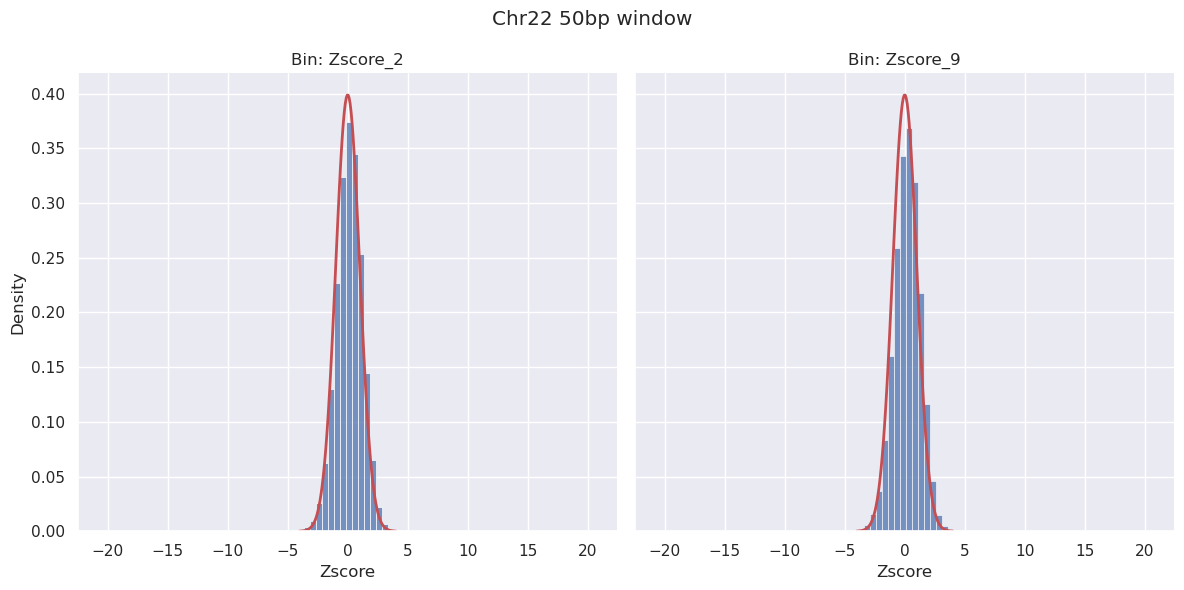

In [28]:
rate_50bp_window_sum_zscore = pd.melt(rate_50bp_window_sum, value_vars=['Zscore_2', 'Zscore_9', "Zscore_Gnocchi"], value_name = "Zscore", var_name = "type")

rate_50bp_window_sum_zscore = rate_50bp_window_sum_zscore[rate_50bp_window_sum_zscore["type"] != "Zscore_Gnocchi"]

sns.set_theme(style="darkgrid")
g = sns.FacetGrid(rate_50bp_window_sum_zscore, col="type", height=6, margin_titles=True)

g.map(sns.histplot, "Zscore", binwidth=0.5, kde=False, stat='density', label='samples')

g.set_titles(col_template="Bin: {col_name}")
# g.set_titles(col_template="Mu: {col_name}", row_template="window length: {row_name}")

g.fig.suptitle(f'Chr22 50bp window')

def standard_normal(*args, **kwargs):
    # x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(-4, 4, 100)
    y_pdf = scipy.stats.norm.pdf(x_pdf)

    plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')   

g.map(standard_normal)

<AxesSubplot:xlabel='Zoonomia_phastcons_primates_mean', ylabel='Proportion'>

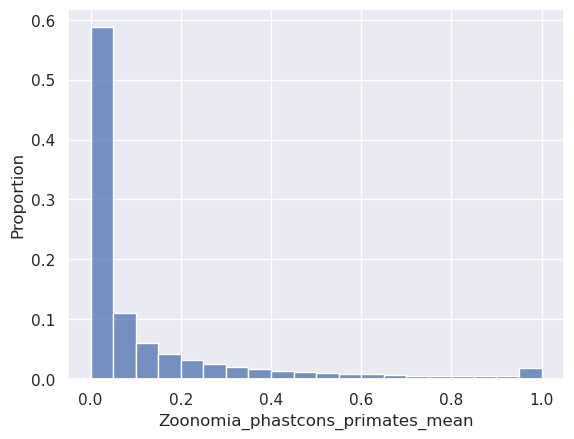

In [33]:
sns.histplot(data=rate_50bp_window_sum, x="Zoonomia_phastcons_primates_mean", binwidth = 0.05, stat = 'proportion')

## Plot QQ Plot

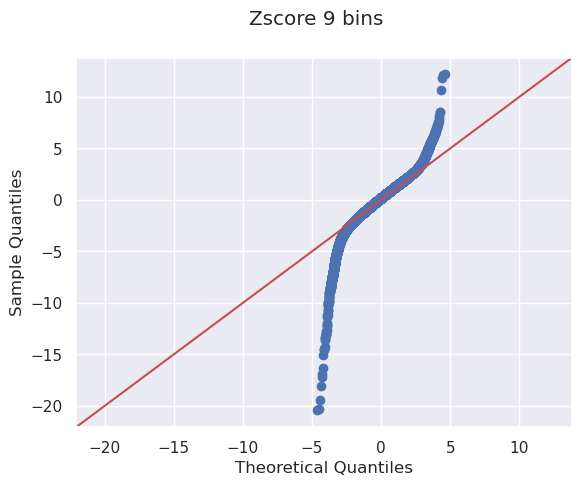

In [29]:
import numpy as np
import statsmodels.api as sm
import pylab

fig = sm.qqplot(rate_50bp_window_sum["Zscore_9"], line='45')
fig.suptitle("Zscore 9 bins")
pylab.show()

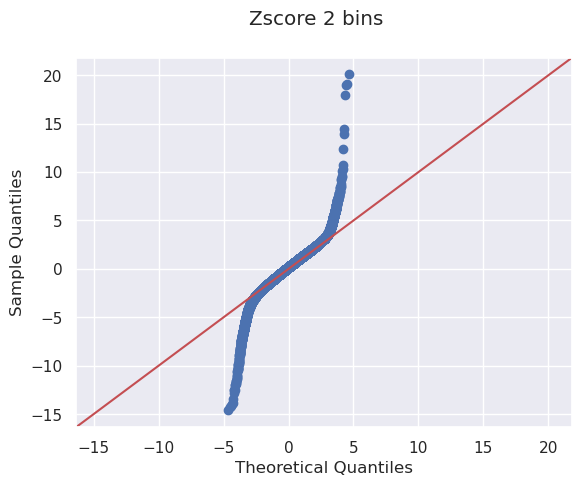

In [30]:
fig = sm.qqplot(rate_50bp_window_sum["Zscore_2"], line='45')
fig.suptitle("Zscore 2 bins")
pylab.show()

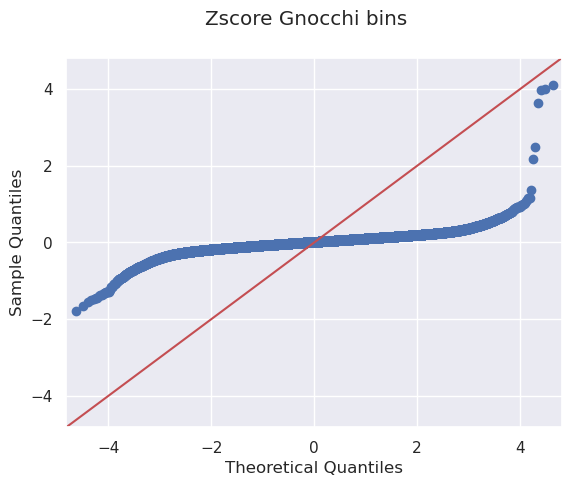

In [31]:
fig = sm.qqplot(rate_50bp_window_sum["Zscore_Gnocchi"], line='45')
fig.suptitle("Zscore Gnocchi bins")
pylab.show()

## Fraction of cds

In [113]:
total_length = len(rate)

In [114]:
print("Fraction of cds in chr22")
average_rate = rate["cds"].sum().compute()/total_length
print(average_rate)

Fraction of cds in chr22
0.07069550093064918


In [115]:
print("Fraction of intergenic in chr22")
average_rate_neutral = rate["Neutral"].sum().compute()/total_length
print(average_rate_neutral)

Fraction of intergenic in chr22
0.031220823524428308


In [116]:
def get_enrichment(df, method, enrichment, percent = 1):
    df_top = df.sort_values(method, ascending = False).iloc[0:int(len(df)*0.01*percent)]
    
    return df_top[enrichment].sum()/df_top["n_sites"].sum()

def get_sites(df, method, enrichment, percent = 1):
    df_top = df.sort_values(method, ascending = False).iloc[0:int(len(df)*0.01*percent)]
    return df_top[enrichment].sum()


In [117]:
method_list = ["Zscore_2", "Zscore_9", "Zscore_Gnocchi", "Zoonomia_phastcons_primates_mean"]

cds_enrichment = [get_enrichment(rate_50bp_window_sum, x, "cds")/average_rate for x in method_list]
neutral_enrichment = [get_enrichment(rate_50bp_window_sum, x, "Neutral")/average_rate_neutral for x in method_list]

In [118]:
df_enrichment = pd.DataFrame(zip(method_list, cds_enrichment, neutral_enrichment), columns = ["method", "cds", "intergenic"])

df_enrichment = pd.melt(df_enrichment, value_vars=['cds', 'intergenic'], id_vars= "method", value_name = "enrichment", var_name = "regions")


In [119]:
df_enrichment

,method,regions,enrichment
0,Zscore_2,cds,3.452878
1,Zscore_9,cds,4.740190
2,Zscore_Gnocchi,cds,3.744765
3,Zoonomia_phastcons_primates_mean,cds,8.588276
4,Zscore_2,intergenic,0.512454
5,Zscore_9,intergenic,0.504246
6,Zscore_Gnocchi,intergenic,0.701003
7,Zoonomia_phastcons_primates_mean,intergenic,0.309717


Text(0.5, 1.0, 'Chr22 Enrichment in top 1% for each metric in 50bp window')

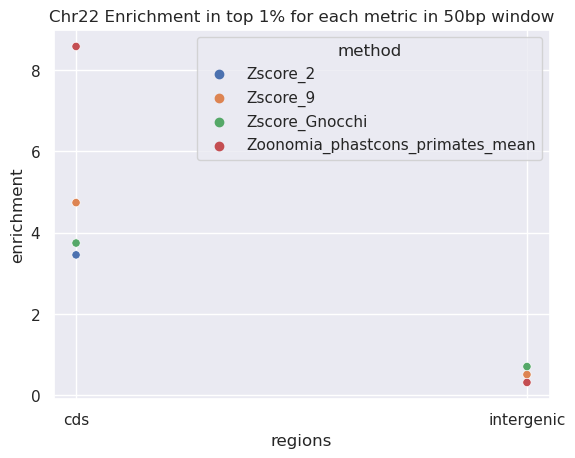

In [120]:
g = sns.scatterplot(data=df_enrichment, x="regions", y="enrichment", hue = "method")

g.set_title("Chr22 Enrichment in top 1% for each metric in 50bp window")